# Dutch Semantic Textual Similarity

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [3]:
language = "Dutch"
data = pd.read_csv("train.csv", sep="\t")

train, test = train_test_split(data, test_size=0.2)


Let's see what are the rows in train and test datasets

In [4]:
train[:10]

,id,sentence_1,sentence_2,similarity
1829,1850,Een man smeert onzorgvuldig boter op een sneet...,De man smeert onzorgvuldig boter op een sneetj...,4.8
6248,6400,Een hond hoedt een roedel witte schapen op een...,Een herdershond drijft een kudde schapen uiteen,4.4
5011,5139,Er is geen man die een kaarttruc doet,Een man doet een kaarttruc,4.0
4509,4625,Een viool wordt bespeeld door een man,Een man speelt viool,5.0
2551,2586,Iemand snijdt champignons met een mes,Iemand snijdt wat paddenstoelen in schijfjes,4.7
8584,8744,Mensen lopen over een touwbrug over een rotsac...,Mensen lopen niet over een touwbrug over een r...,2.9
7621,7776,Een surfer rijdt op een grote golf door donker...,De surfer rijdt een grote golf,4.4
174,175,Een familie kijkt naar een kleine jongen die e...,Een jongen slaat een honkbal,4.2
3683,3757,Er is geen jongen die naar een kalender kijkt,Een jongen bestudeert een kalender,3.4
2143,2170,Een vrouw gebruikt een naaimachine,Een vrouw naait met een machine,5.0


In [5]:
train.describe()

,id,similarity
count,7872.000000,7872.000000
mean,5042.751397,3.522573
std,2914.033339,1.016635
min,3.000000,1.000000
25%,2509.750000,3.000000
50%,5073.500000,3.600000
75%,7596.000000,4.300000
max,10000.000000,5.000000


In [6]:
test[:10]

,id,sentence_1,sentence_2,similarity
2955,2992,Een jongen oefent op het keyboard,Een jongen zit in een kamer en bespeelt een pi...,3.5
442,443,Een blond meisje rijdt op de golven,Een blond meisje kijkt naar de golven,3.8
5879,6031,Een hond achtervolgt de staart van een dier in...,"Een hond, die klein is, zit achter een grote b...",3.7
6874,7029,Sommige kinderen spelen op een speelplaats,Sommige kinderen spelen niet op een speelplaats,3.6
6167,6319,Een gele hond rent op witte sneeuw op een zonn...,"Een hond, die bruin is, loopt door de sneeuw",3.8
1232,1250,Een vrouw schilt een aardappel,Een vrouw snijdt een tomaat in schijfjes,3.0
4526,4643,Een man snijdt een koord door met een zwaard,Een man snijdt een touw door met een zwaard,4.5
9443,9603,Een gele hond rent een zandpad af,Er loopt een golden retriever,3.3
420,421,Twee mannen met fietsen staan aan de kant van ...,Twee mannen nemen een pauze van een reis op ee...,3.7
8327,8487,Een man zonder shirt speelt voetbal op een gazon,Een man zonder shirt speelt voetbal op een veld,4.1


In [7]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

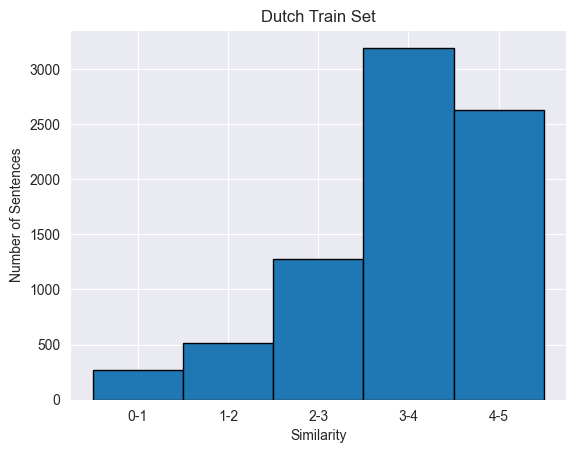

In [8]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

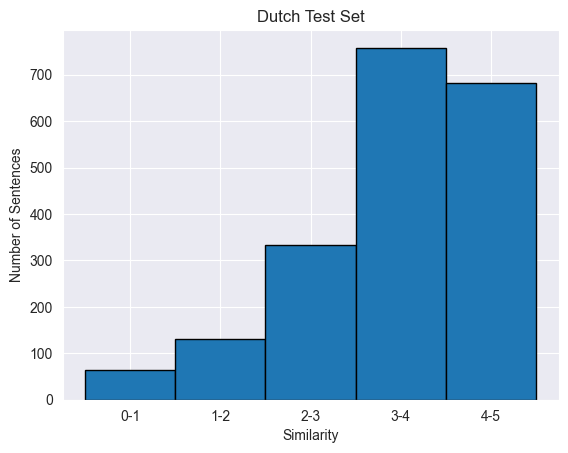

In [9]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [10]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(row.split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(row.split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [11]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

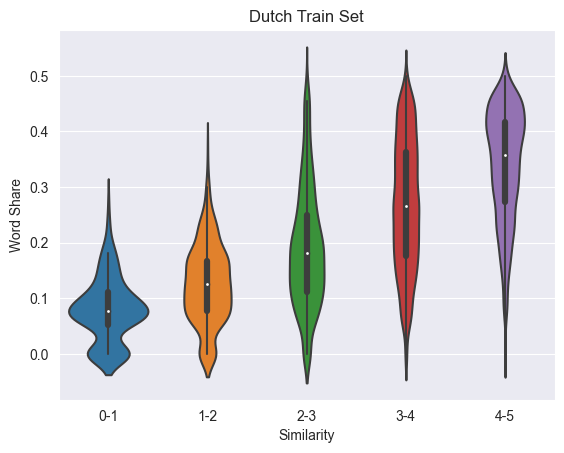

In [12]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

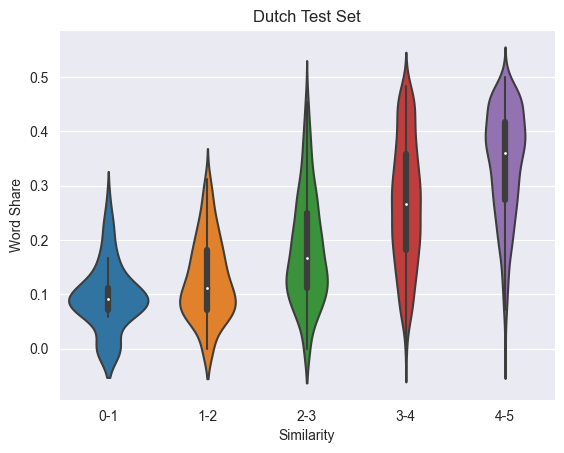

In [13]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [14]:
train[:10]

,id,sentence_1,sentence_2,similarity,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
1829,1850,Een man smeert onzorgvuldig boter op een sneet...,De man smeert onzorgvuldig boter op een sneetj...,4.8,4-5,1,1,72,61,11,9,7.0,19,0.368421,2,0
6248,6400,Een hond hoedt een roedel witte schapen op een...,Een herdershond drijft een kudde schapen uiteen,4.4,4-5,1,1,65,47,11,7,2.0,15,0.133333,2,0
5011,5139,Er is geen man die een kaarttruc doet,Een man doet een kaarttruc,4.0,3-4,1,1,37,26,8,5,4.0,12,0.333333,2,0
4509,4625,Een viool wordt bespeeld door een man,Een man speelt viool,5.0,4-5,1,1,37,20,7,4,3.0,10,0.300000,2,0
2551,2586,Iemand snijdt champignons met een mes,Iemand snijdt wat paddenstoelen in schijfjes,4.7,4-5,1,1,37,44,6,6,2.0,12,0.166667,2,0
8584,8744,Mensen lopen over een touwbrug over een rotsac...,Mensen lopen niet over een touwbrug over een r...,2.9,2-3,1,1,58,63,9,10,7.0,15,0.466667,2,0
7621,7776,Een surfer rijdt op een grote golf door donker...,De surfer rijdt een grote golf,4.4,4-5,1,1,57,30,10,6,5.0,15,0.333333,2,0
174,175,Een familie kijkt naar een kleine jongen die e...,Een jongen slaat een honkbal,4.2,4-5,1,1,62,28,11,5,3.0,13,0.230769,2,0
3683,3757,Er is geen jongen die naar een kalender kijkt,Een jongen bestudeert een kalender,3.4,3-4,1,1,45,34,9,5,3.0,13,0.230769,2,0
2143,2170,Een vrouw gebruikt een naaimachine,Een vrouw naait met een machine,5.0,4-5,1,1,34,31,5,6,2.0,9,0.222222,2,0


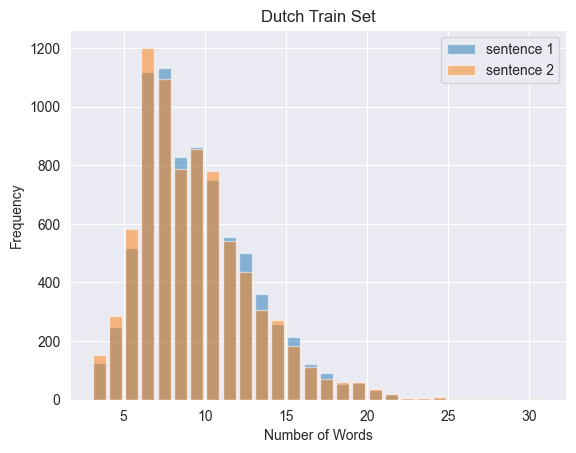

In [15]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

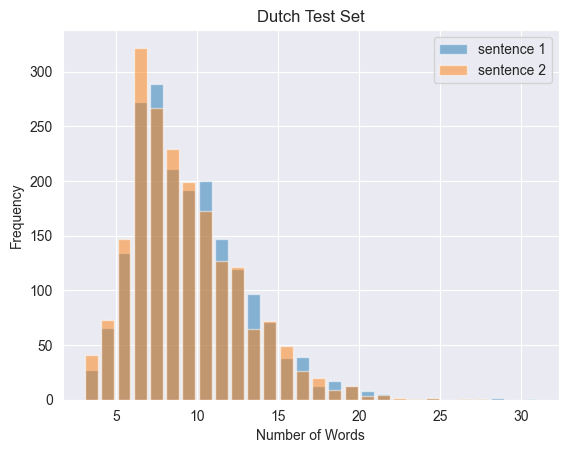

In [16]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [17]:
train.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,7872.000000,7872.000000,7872.0,7872.0,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.0,7872.0
mean,5042.751397,3.522573,1.0,1.0,47.857978,46.984248,9.062754,8.902947,4.336382,16.278201,0.263306,2.0,0.0
std,2914.033339,1.016635,0.0,0.0,18.884033,19.130031,3.511800,3.550136,2.768162,5.264286,0.127937,0.0,0.0
min,3.000000,1.000000,1.0,1.0,10.000000,10.000000,3.000000,2.000000,0.000000,5.000000,0.000000,2.0,0.0
25%,2509.750000,3.000000,1.0,1.0,34.000000,33.000000,6.000000,6.000000,2.000000,12.000000,0.166667,2.0,0.0
50%,5073.500000,3.600000,1.0,1.0,45.000000,44.000000,8.000000,8.000000,4.000000,16.000000,0.266667,2.0,0.0
75%,7596.000000,4.300000,1.0,1.0,59.000000,57.000000,11.000000,11.000000,6.000000,20.000000,0.375000,2.0,0.0
max,10000.000000,5.000000,1.0,1.0,158.000000,158.000000,30.000000,30.000000,21.000000,51.000000,0.500000,2.0,0.0


In [18]:
test.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,1968.000000,1968.000000,1968.0,1968.0,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.0,1968.0
mean,4918.579268,3.537889,1.0,1.0,47.860264,46.372459,9.076728,8.750000,4.298272,16.191565,0.262084,2.0,0.0
std,2836.463930,1.018874,0.0,0.0,19.200446,18.662333,3.553027,3.439284,2.772689,5.229787,0.127287,0.0,0.0
min,1.000000,1.000000,1.0,1.0,12.000000,10.000000,3.000000,2.000000,0.000000,6.000000,0.000000,2.0,0.0
25%,2428.500000,3.000000,1.0,1.0,34.000000,32.000000,6.000000,6.000000,2.000000,12.000000,0.153846,2.0,0.0
50%,4956.000000,3.700000,1.0,1.0,44.500000,43.000000,8.000000,8.000000,4.000000,15.000000,0.266667,2.0,0.0
75%,7310.250000,4.300000,1.0,1.0,59.000000,57.000000,11.000000,11.000000,6.000000,19.000000,0.375000,2.0,0.0
max,9990.000000,5.000000,1.0,1.0,158.000000,136.000000,30.000000,27.000000,20.000000,43.000000,0.500000,2.0,0.0
